In [38]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

In [3]:
env = gym.make("FrozenLake-v1", render_mode = "human", is_slippery = False)
obs, info = env.reset()
# env.render()

In [4]:
q_table = np.zeros((16, 4))

In [5]:
n_states = env.observation_space.n
n_actions = env.action_space.n

In [9]:
q_table = np.zeros((n_states, n_actions))

In [11]:
action = env.action_space.sample()

In [13]:
obs, reward, terminated, truncated, info = env.step(action)
env.render()

In [15]:
reward

0.0

In [50]:
episodes = 1000
alpha = 0.5
gamma = 0.9
epsilon= 1
epsilon_decay = 0.001

In [52]:
outcomes = []

In [54]:
for _ in range(episodes):
    obs, info = env.reset()
    terminated, truncated = False, False
    outcomes.append("Failure")

    while not terminated or truncated:
        print(_)
        rnd = np.random.random()
        if rnd < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[obs])
            
        # print(env.step(action))
        # break

        new_obs, reward, terminated, truncated, info = env.step(action)
        q_table[obs, action] = q_table[obs, action] + alpha * (reward + gamma * np.max(q_table[new_obs] - q_table[obs, action]))
        obs = new_obs
        if reward:
            outcomes[-1] = "Success"
    epsilon = max(epsilon - epsilon_decay, 0)

0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
2
2
3
3
3
3
3
3
4
4
4
5
5
5
5
6
6
6
6
6
6
7
7
7
7
7
7
7
8
8
8
8
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
11
11
11
11
11
11
11
11
11
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
14
14
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
21
21
21
22
22
22
23
23
23
23
23
23
23
24
24
24
24
24
24
24
24
24
24
24
24
24
25
25
26
26
27
27
27
27
28
28
29
29
29
29
30
30
31
31
31
31
31
31
31
31
31
31
31
32
32
32
32
32
32
33
33
34
34
35
35
35
35
35
35
35
35
35
35
35
35
35
36
36
36
36
36
36
36
36
37
37
38
38
38
38
38
38
38
39
39
39
39
39
40
40
40
40
40
40
40
40
40
40
41
41
41
42
42
42
43
43
44
44
45
45
46
46
46
46
46
46
46
47
47
47
47
47
47
47
48
48
48
48
48
48
48
48
48
48
48
48
48
48
49
49
49
49
49
49
49
50
50
51
51
51
51
51
51
51
51
51
52
52
52
52
52
52
52
52
52
52
52
53
53
53
53
54
54
54
54
54
54
54
54
54
54
54
54
55
55
55
55
55
55
55
55
56
56
56
5

In [55]:
print(q_table)

[[1.11111111 1.11111111 1.11111111 1.11111111]
 [1.11111111 0.         1.11111111 1.11111111]
 [1.11111111 1.11111111 1.11111111 1.11111111]
 [1.11111111 0.         1.11111111 1.11111111]
 [1.11111111 1.11111111 0.         1.11111111]
 [0.         0.         0.         0.        ]
 [0.         1.11111111 0.         1.11111111]
 [0.         0.         0.         0.        ]
 [1.11111064 0.         1.10325644 1.11111111]
 [1.10590912 1.11111111 1.11064287 0.        ]
 [1.11111111 1.11111111 0.         1.11111111]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         1.11106613 1.11111111 1.0331301 ]
 [1.11111111 1.11111111 1.11111111 1.11111111]
 [0.         0.         0.         0.        ]]


<BarContainer object of 1000 artists>

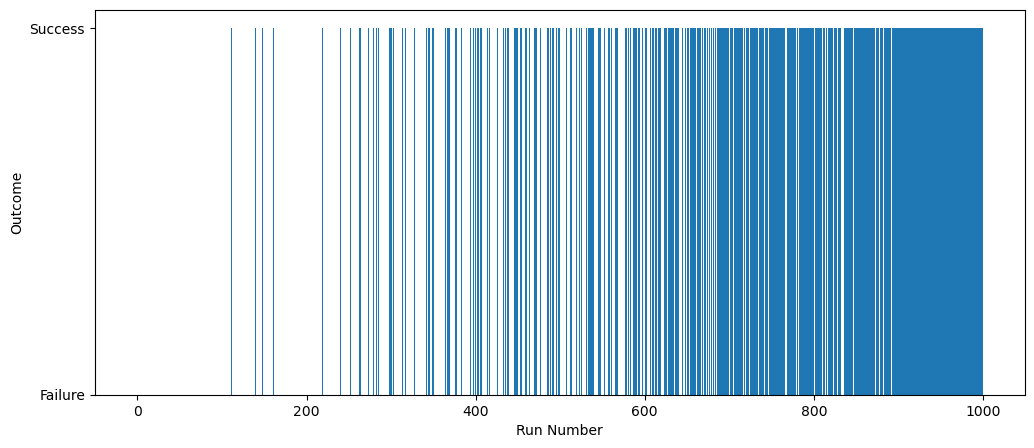

In [58]:
plt.figure(figsize = (12, 5))
plt.xlabel("Run Number")
plt.ylabel("Outcome")
ax = plt.gca()
plt.bar(range(len(outcomes)), outcomes, width = 1)


Evaluation

In [61]:
episodes = 100
success = 0

for _ in range(episodes):
    obs, info = env.reset()
    terminated, truncated = False, False

    while not terminated or truncated:
        action = np.argmax(q_table[obs])
        new_obs, reward, terminated, truncated, info = env.step(action)
        obs = new_obs
        success += reward
print(f"Success : {success/episodes}")

Success : 1.0
